In [118]:
import cv2
import numpy as np

#This will display all the available mouse click events  
#events = [i for i in dir(cv2) if 'EVENT' in i]
#print(events)

#This variable we use to store the pixel location
refPt = []

#click event function
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,",",y)
        refPt.append([x,y])
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = str(x)+", "+str(y)
        cv2.putText(img, strXY, (x,y), font, 0.5, (255,255,0), 2)
        cv2.imshow("image", img)

    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y, x, 0]
        green = img[y, x, 1]
        red = img[y, x, 2]
        font = cv2.FONT_HERSHEY_SIMPLEX
        strBGR = str(blue)+", "+str(green)+","+str(red)
        cv2.putText(img, strBGR, (x,y), font, 0.5, (0,255,255), 2)
        cv2.imshow("image", img)


#Here, you need to change the image name and it's path according to your directory
img = cv2.imread("raster_map.png")
cv2.imshow("image", img)

#calling the mouse click event
cv2.setMouseCallback("image", click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

104 , 165
603 , 620


In [119]:
print(refPt)

[[104, 165], [603, 620]]


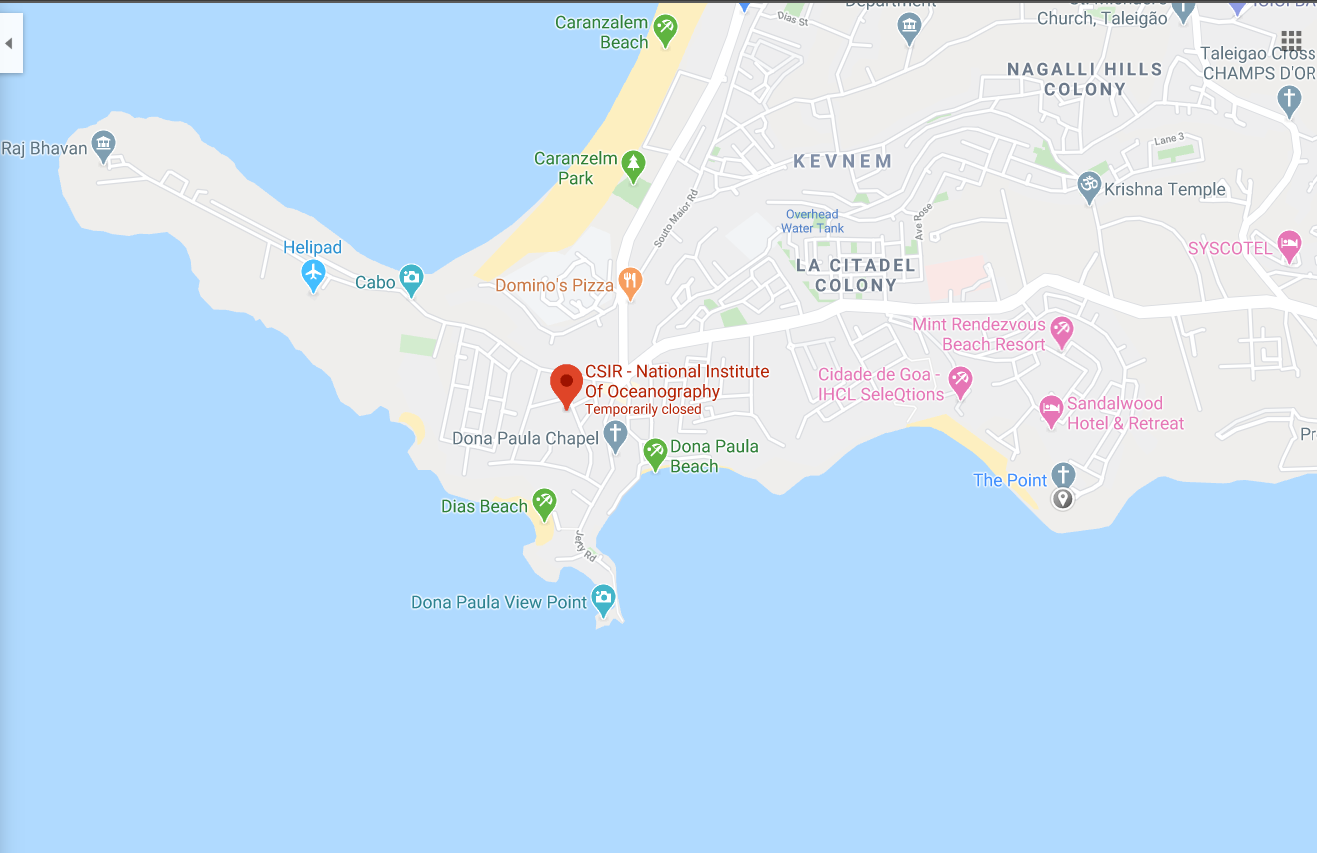

1317 x 853


In [120]:
import PIL
from PIL import Image

imgp = Image.open('raster_map.png')
display(imgp)

print('{0} x {1}'.format(imgp.width,imgp.height))

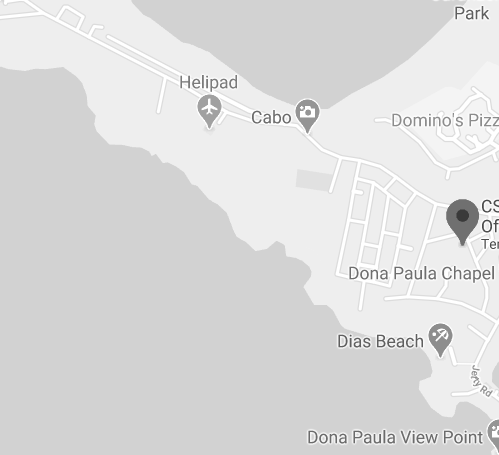

In [121]:
imgp_crop = imgp.crop((refPt[0][0],refPt[0][1],refPt[1][0],refPt[1][1]))
imgp_crop = imgp_crop.convert('L')
display(imgp_crop)
imgp_crop.save('crop.png')

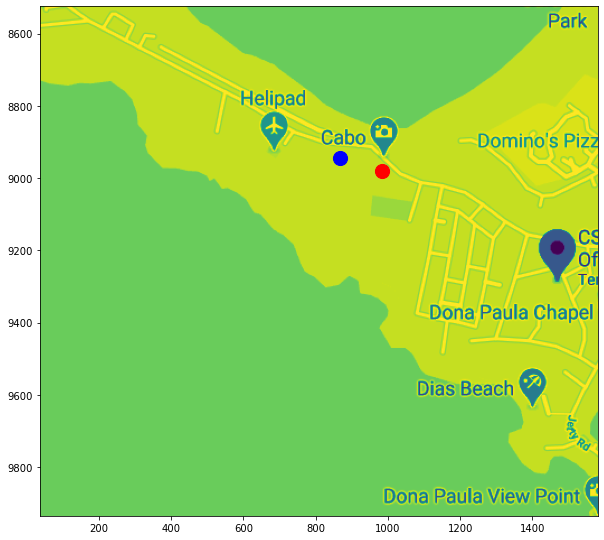

In [122]:
import matplotlib.pyplot as plt
import utm

loc1 = utm.from_latlon(15.463283, 73.788545)
loc2 = utm.from_latlon(15.450617, 73.803015)

map_plot = plt.imread('crop.png')
bounding_box = (loc1[0]%10000,loc2[0]%10000,loc1[1]%10000,loc2[1]%10000)

loc3 = utm.from_latlon(15.459454, 73.797392)
loc4 = utm.from_latlon(15.454740,73.796335)

latitude = [loc3[0]%10000,loc4[0]%10000]
longitude = [(loc2[1]-loc3[1])%10000-40,loc4[1]%10000-40]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(latitude[0],longitude[0],color='red',s=200)
ax.scatter(latitude[1],longitude[1],color='blue',s=200)

ax.imshow(map_plot,extent=bounding_box)

In [99]:
u = utm.from_latlon(15.459454, 73.797392)
print(u[0]%10000,u[1]%10000)

982.6752581013134 9505.633789840387
